## @author - Pardeep
## transfer learning model using MobileNetV2
### reference :- https://keras.io/api/applications/mobilenet/#mobilenetv2-function

# Data Preprocessing

In [5]:
from keras.preprocessing.image import ImageDataGenerator

### Preprocessing the Training set

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'Data\train mix data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 272 images belonging to 30 classes.


### Preprocessing the Test set (contains random images only)

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'Data\Google images only',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 122 images belonging to 30 classes.


### Preprocessing the test set (contains dataset images only)

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
val_set = test_datagen.flow_from_directory(r'Data\Dataset images only',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 150 images belonging to 30 classes.


# importing transfer learning model

In [9]:
# import necessary library
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Sequential
from keras.layers import *

In [10]:
# load and creare a model object
v2model = MobileNetV2(input_shape=[224,224,3], weights='imagenet', include_top=False)
# model summary
#v2model.summary()

# preprocessing pre trained model

In [11]:
for layer in v2model.layers:
    layer.trainable = False

## adding layer for flattening the outputs from previous layers

In [12]:
x = Flatten()(v2model.output)

## adding layer for classification

In [13]:
from glob import glob

In [14]:
prediction = Dense(30, activation='softmax')(x)

In [15]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model

In [16]:
# create a model object
model = Model(inputs=v2model.input, outputs=prediction)

# Training the transfer learning model

### Compiling the CNN

In [17]:
model.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

### To avoid model to overfitting 

In [18]:
from keras.callbacks import EarlyStopping

In [19]:
earlystop = EarlyStopping(monitor='accuracy', patience=3, verbose=2)

### Training the CNN on the Training set and evaluating it on the Test set

In [20]:
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size

In [21]:
a= model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN, callbacks= earlystop,epochs = 20)

Epoch 1/20
8/8 [==============================] - 11s 1s/step - loss: 14.4729 - accuracy: 0.1440
Epoch 2/20
8/8 [==============================] - 7s 895ms/step - loss: 7.0636 - accuracy: 0.5430
Epoch 3/20
8/8 [==============================] - 7s 891ms/step - loss: 3.6413 - accuracy: 0.7469
Epoch 4/20
8/8 [==============================] - 7s 901ms/step - loss: 2.0672 - accuracy: 0.8563
Epoch 5/20
8/8 [==============================] - 8s 1s/step - loss: 1.1448 - accuracy: 0.9031
Epoch 6/20
8/8 [==============================] - 8s 1s/step - loss: 0.8453 - accuracy: 0.9500
Epoch 7/20
8/8 [==============================] - 7s 904ms/step - loss: 0.1235 - accuracy: 0.9869
Epoch 8/20
8/8 [==============================] - 7s 906ms/step - loss: 0.4003 - accuracy: 0.9706
Epoch 9/20
8/8 [==============================] - 7s 902ms/step - loss: 0.0651 - accuracy: 0.9927
Epoch 10/20
8/8 [==============================] - 8s 1s/step - loss: 0.0126 - accuracy: 0.9991
Epoch 11/20
8/8 [============

### accuracy and losses

### Accuracy Over Random google images

In [25]:
STEP_SIZE_TEST=test_set.n//test_set.batch_size

In [29]:
test_loss, test_acc =model.evaluate(test_set)
print("Accuracy on google images: ",test_acc)

4/4 [==============================] - 3s 557ms/step - loss: 5.5055e-04 - accuracy: 1.0000
Accuracy on google images:  1.0


### Accuracy Over Dataset Images

In [30]:
print("loss on google images: ",test_loss)

loss on google images:  0.0005505534936673939


In [31]:
STEP_SIZE_VALID=val_set.n//val_set.batch_size

In [32]:
test_loss, test_acc =model.evaluate(val_set,steps=STEP_SIZE_VALID)
print("Accuracy on Dataset images: ",test_acc)

4/4 [==============================] - 4s 1s/step - loss: 0.6028 - accuracy: 0.9141
Accuracy on Dataset images:  0.9140625


In [33]:
print("loss on Dataset images: ",test_loss)

loss on Dataset images:  0.6028386950492859


In [35]:
import matplotlib.pyplot as plt

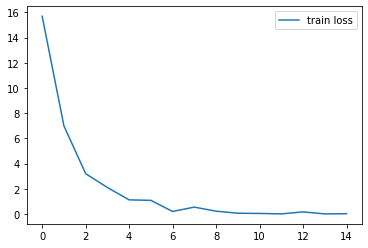

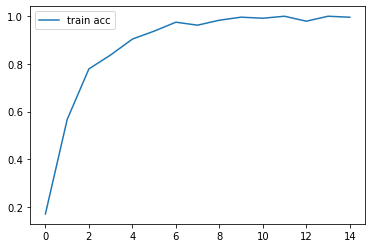

In [36]:
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

## saving a model

In [43]:
import tensorflow as tf

from keras.models import load_model

model.save('limiteddatamobilenetv2.h5')

# This Trained over 5 images from Dataset data and rest from Google fetched pics